In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import itertools
pd.options.mode.chained_assignment = None

In [5]:
ccp = {'a_alpina' : 60.02,
    'a_thaliana' : 60.02, 
 'b_gravinae': 32.24,
 'b_oleracea' : 50.52,
 'b_tournefortii': 47.46,
 'c_annua' : 55.33,
 'c_gynandra' : 4.28,
 'd_erucoides': 33.04,
 'd_tenuifolia' : 12.68,
 'd_viminea' : 51.08,
 'h_incana1' : 50.50,
 'h_incana3' : 38.37,
 'm_arvensis' : 24.42,
 'm_moricandioides' : 51.59,
 'm_nitens' : 21.04,
 'm_suffruticosa' : 24.87}

In [6]:
#make a dict with every csv in folder

os.chdir("<output_files_from_03_annotations/>")


#make a dict with every csv in folder
#os.chdir("<output_files_from_03_annotations/>")

for file in glob.glob("*_save.csv"):
    files['type'] = ['over', 'upstream', 'downstream', 'start', 'end']
    lens = []
    raw = pd.read_csv(file)
    lens.append(len(raw[raw['location'] == 'over']))
    #lens.append(len(raw[raw['location'] == 'within'])) #there are no
    lens.append(len(raw[raw['location'] == 'upstream']))
    lens.append(len(raw[raw['location'] == 'downstream']))
    lens.append(len(raw[raw['location'] == 'start']))
    lens.append(len(raw[raw['location'] == 'end']))
    files['_'.join(file.split('_')[:2])] = lens

In [7]:
files

,type,d_erucoides,d_viminea,b_gravinae,m_moricandioides,m_arvensis,d_tenuifolia,h_incana1,m_nitens,h_incana3,a_thaliana,b_oleracea
0,over,1066,660,1117,494,684,871,940,316,726,439,397
1,upstream,2863,1643,2888,1710,2927,2565,2335,1616,1741,641,1631
2,downstream,2662,1618,2567,1582,2774,2377,2130,1536,1520,606,1514
3,start,734,493,785,460,819,672,650,455,450,234,514
4,end,513,306,453,253,470,370,379,246,256,142,282


In [8]:
sums = []
for i in range(len(files)):
    sums.append(sum(files.loc[i][1:]))
files['sum'] = sums
files

,type,d_erucoides,d_viminea,b_gravinae,m_moricandioides,m_arvensis,d_tenuifolia,h_incana1,m_nitens,h_incana3,a_thaliana,b_oleracea,sum
0,over,1066,660,1117,494,684,871,940,316,726,439,397,7710
1,upstream,2863,1643,2888,1710,2927,2565,2335,1616,1741,641,1631,22560
2,downstream,2662,1618,2567,1582,2774,2377,2130,1536,1520,606,1514,20886
3,start,734,493,785,460,819,672,650,455,450,234,514,6266
4,end,513,306,453,253,470,370,379,246,256,142,282,3670


In [10]:
c3 = files[['type', 'm_moricandioides', 'h_incana1', 'a_thaliana', 'b_oleracea', 'd_viminea']]
c34 = files[['type','b_gravinae', 'd_erucoides', 'm_arvensis', 'd_tenuifolia', 'h_incana3', 'm_nitens']]

In [11]:
means = []
for i in [0, 1, 2, 3, 4]:
    means.append(np.mean((c3.loc[i])[1:]))
c3['means'] = means

means = []
for i in [0, 1, 2, 3, 4]:
    means.append(np.mean((c34.loc[i])[1:]))
c34['means'] = means

In [12]:
c3

,type,m_moricandioides,h_incana1,a_thaliana,b_oleracea,d_viminea,means
0,over,494,940,439,397,660,586.0
1,upstream,1710,2335,641,1631,1643,1592.0
2,downstream,1582,2130,606,1514,1618,1490.0
3,start,460,650,234,514,493,470.2
4,end,253,379,142,282,306,272.4


In [13]:
c34

,type,b_gravinae,d_erucoides,m_arvensis,d_tenuifolia,h_incana3,m_nitens,means
0,over,1117,1066,684,871,726,316,796.666667
1,upstream,2888,2863,2927,2565,1741,1616,2433.333333
2,downstream,2567,2662,2774,2377,1520,1536,2239.333333
3,start,785,734,819,672,450,455,652.500000
4,end,453,513,470,370,256,246,384.666667


In [14]:
per = [i/(sum(c3['means']))*100 for i in c3['means']]
c3['percent'] = per
c3 = c3.sort_values(by = 'means').reset_index()
c3

per = [i/(sum(c34['means']))*100 for i in c34['means']]
c34['percent'] = per
c34 = c34.sort_values(by = 'means').reset_index()
c34

,index,type,b_gravinae,d_erucoides,m_arvensis,d_tenuifolia,h_incana3,m_nitens,means,percent
0,4,end,453,513,470,370,256,246,384.666667,5.912037
1,3,start,785,734,819,672,450,455,652.500000,10.028433
2,0,over,1117,1066,684,871,726,316,796.666667,12.244166
3,2,downstream,2567,2662,2774,2377,1520,1536,2239.333333,34.416865
4,1,upstream,2888,2863,2927,2565,1741,1616,2433.333333,37.398499


In [15]:
c3

,index,type,m_moricandioides,h_incana1,a_thaliana,b_oleracea,d_viminea,means,percent
0,4,end,253,379,142,282,306,272.4,6.176030
1,3,start,460,650,234,514,493,470.2,10.660681
2,0,over,494,940,439,397,660,586.0,13.286174
3,2,downstream,1582,2130,606,1514,1618,1490.0,33.782252
4,1,upstream,1710,2335,641,1631,1643,1592.0,36.094862


In [16]:
colors = ['#E0CB41', '#7ad151', '#22a884', '#2a788e', '#414487']
c3['colors'] = colors
c34['colors'] = colors

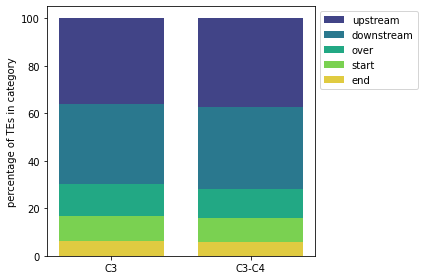

In [17]:
handles = []
width = 0.75
for i in range(len(c3)):
    h= plt.bar(1, c3['percent'][i] , bottom = sum(c3['percent'][:i]), width = width, color = c3['colors'][i], label = c3['type'][i])
    handles.append(h)
for i in range(len(c34)):
    h1 = plt.bar(2, c34['percent'][i] , bottom = sum(c34['percent'][:i]), width = width, color = c3['colors'][i])

plt.xticks([1, 2], ['C3', 'C3-C4'])
plt.ylabel('percentage of TEs in category')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', handles=handles[::-1])
plt.tight_layout()